In [1]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os
import pickle
import tqdm

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

In [2]:
import pickle
with open("raw_all_gangdong.pkl", 'rb') as f:
    raw_all_gangdong = pickle.load(f)

In [3]:
raw_all_gangdong.shape

(744, 13)

In [4]:
raw_all_gangdong.head()

,rent_count,rent_trend,rent_seasonal,count_Day,count_Week,count_diff,DateTime,Year,Quarter,Day,DayofWeek,rent_count_lag1,rent_count_lag2
DateTime,,,,,,,,,,,,,
2021-01-01 00:00:00,14.00,31.62,-19.84,31.71,32.40,1.00,2021-01-01 00:00:00,2021,1,1,4,14.00,14.00
2021-01-01 01:00:00,15.00,31.62,-23.21,31.71,32.40,1.00,2021-01-01 01:00:00,2021,1,1,4,14.00,14.00
2021-01-01 02:00:00,7.00,31.62,-26.40,31.71,32.40,-8.00,2021-01-01 02:00:00,2021,1,1,4,15.00,14.00
2021-01-01 03:00:00,6.00,31.62,-28.99,31.71,32.40,-1.00,2021-01-01 03:00:00,2021,1,1,4,7.00,15.00
2021-01-01 04:00:00,6.00,31.62,-27.74,31.71,32.40,0.00,2021-01-01 04:00:00,2021,1,1,4,6.00,7.00


In [5]:
with open("OLS(raw_all_gangdong).pkl", 'rb') as f:
    fit_reg1 = pickle.load(f)

In [6]:
fit_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rent_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.341e+07
Date:                Fri, 25 Jun 2021   Prob (F-statistic):               0.00
Time:                        08:43:12   Log-Likelihood:                 1237.0
No. Observations:                 672   AIC:                            -2454.
Df Residuals:                     662   BIC:                            -2409.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
rent_trend      -4.081e-05      0.000     -0.219      0.827      -0.000       0.000
rent_seasonal    7.836e-05      0.000      0.696      0.487      -0.000       0.000
count_Day        3.828e-06      0.000      0.022      0.982      -0.000       0.000
count_Week         -0.0002      0.000     -0.780      0.436      -0.001       0.000
count_diff          1.0000      0.000   8914.236      0.000       1.000       1.000
Year            -1.823e-07   3.04e-06     -0.060      0.952   -6.15e-06    5.79e-06
Quarter         -9.023e-11    1.5e-09     -0.060      0.952   -3.04e-09    2.86e-09
Day                 0.0004      0.000      1.910      0.057   -1.14e-05       0.001
DayofWeek          -0.0003      0.001     -0.337      0.736      -0.002       0.001
rent_count_lag1     1.0000      0.000   8807.472      0.000       1.000       1.000
rent_count_lag2  1.835e-05   9.88e-05      0.186      0.853      -0.000       0.000
==============================================================================
Omnibus:                     1721.334   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12153932.058
Skew:                         -25.569   Prob(JB):                         0.00
Kurtosis:                     659.851   Cond. No.                     6.02e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.58e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

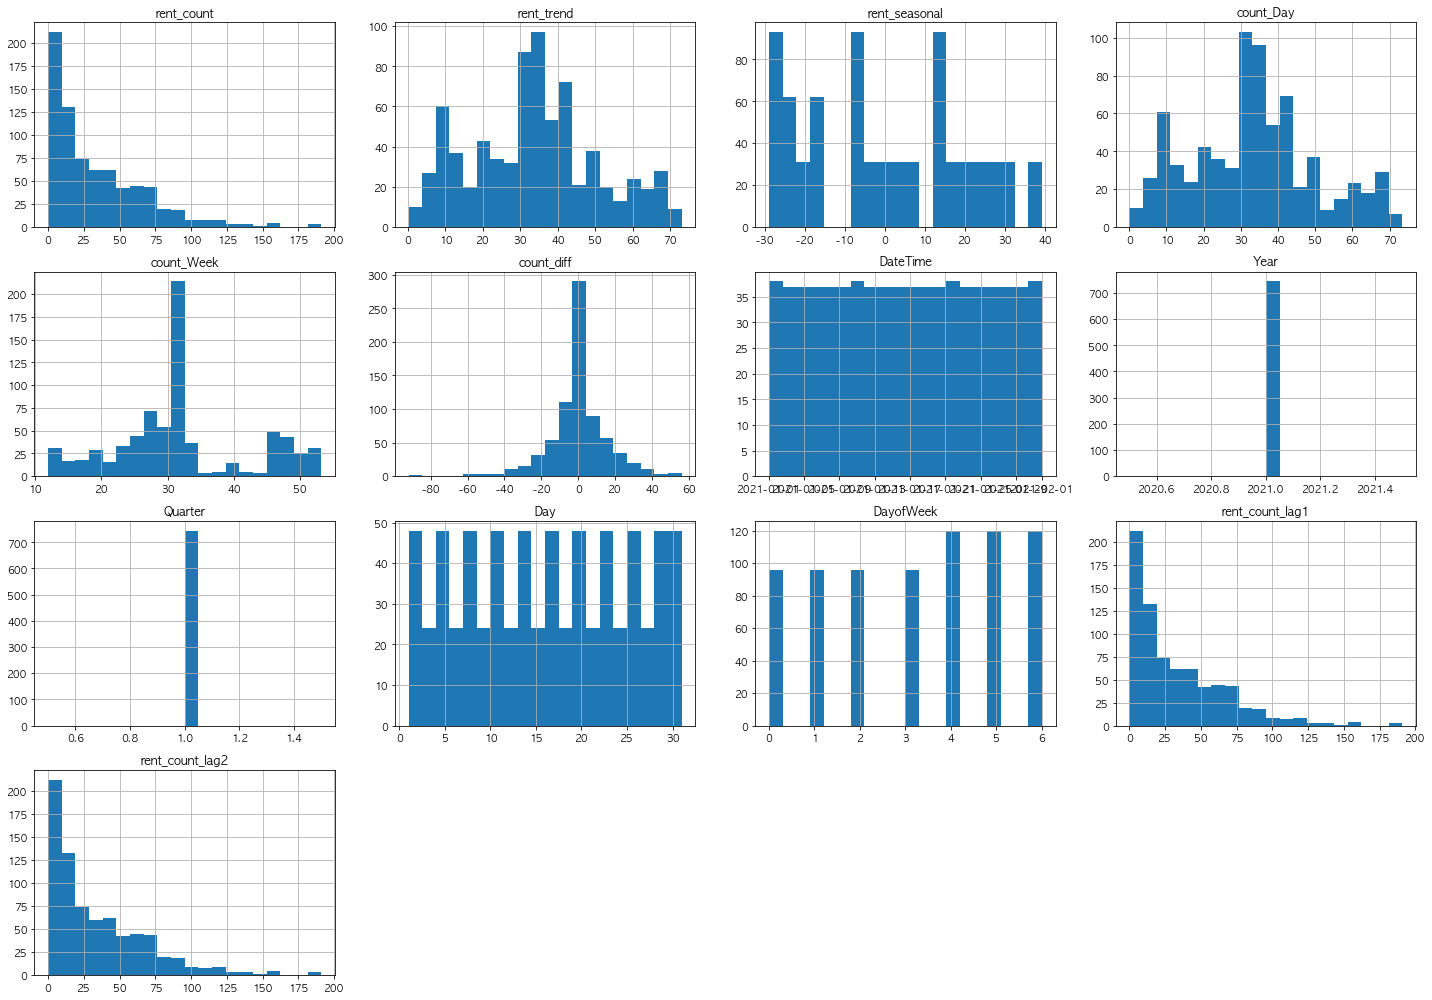

In [12]:
raw_all_gangdong.hist(bins=20, figsize=(20,14))
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'rent_count'}, xlabel='count_diff'>

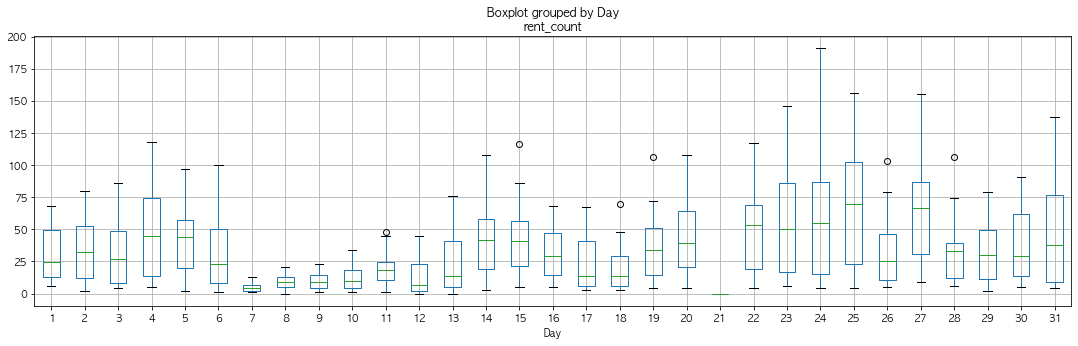

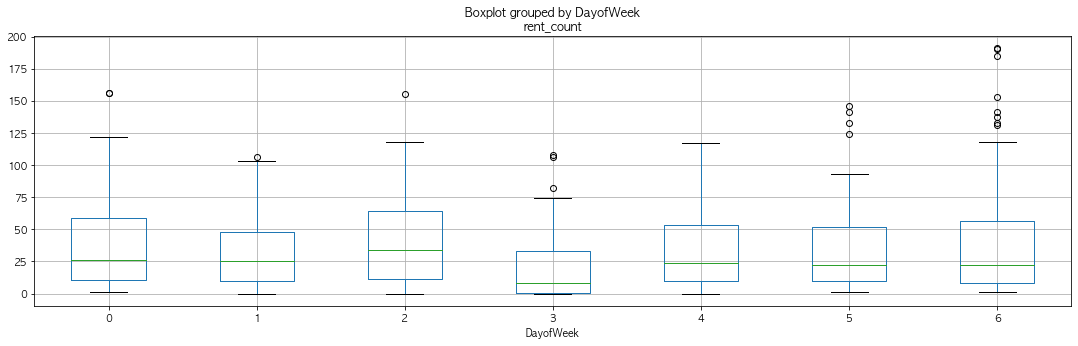

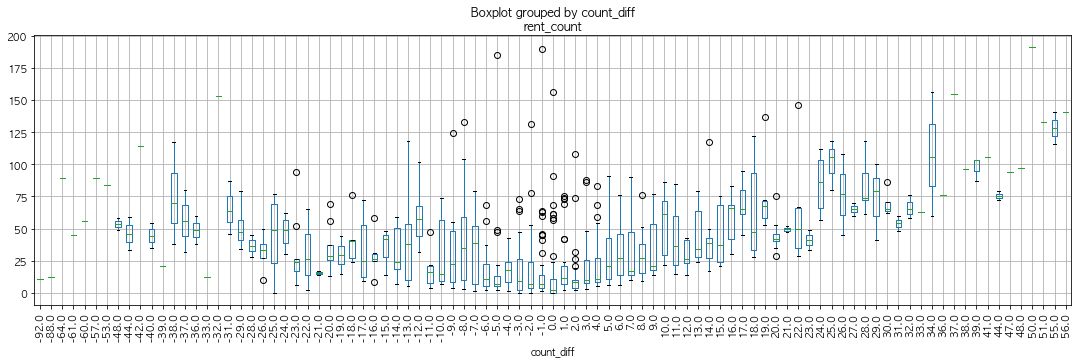

In [24]:
raw_all_gangdong.boxplot(column='rent_count', by='Day', grid=True, figsize=(18,5))
raw_all_gangdong.boxplot(column='rent_count', by='DayofWeek', grid=True, figsize=(18,5))
raw_all_gangdong.boxplot(column='rent_count', by='count_diff', grid=True, figsize=(18,5), rot=90)

In [21]:
raw_all_gangdong.rent_count_lag1

DateTime
2021-01-01 00:00:00   14.00
2021-01-01 01:00:00   14.00
2021-01-01 02:00:00   15.00
2021-01-01 03:00:00    7.00
2021-01-01 04:00:00    6.00
                       ... 
2021-01-31 19:00:00   84.00
2021-01-31 20:00:00   74.00
2021-01-31 21:00:00   68.00
2021-01-31 22:00:00   69.00
2021-01-31 23:00:00   32.00
Freq: H, Name: rent_count_lag1, Length: 744, dtype: float64

<AxesSubplot:xlabel='Day', ylabel='rent_count'>

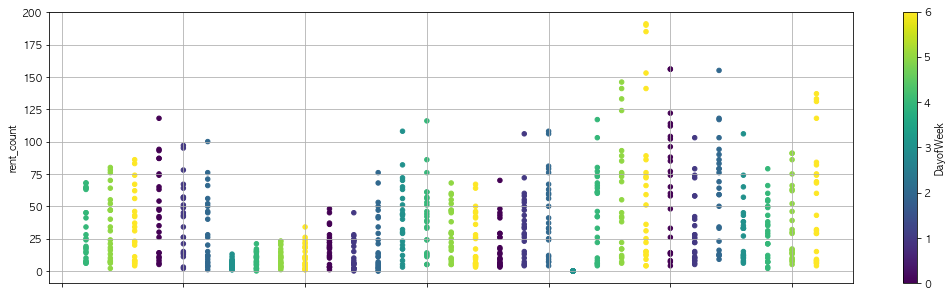

In [25]:
raw_all_gangdong.plot.scatter(y='rent_count', x='Day', c='DayofWeek', grid=True, figsize=(18,5), colormap='viridis')

<AxesSubplot:xlabel='count_diff', ylabel='rent_count'>

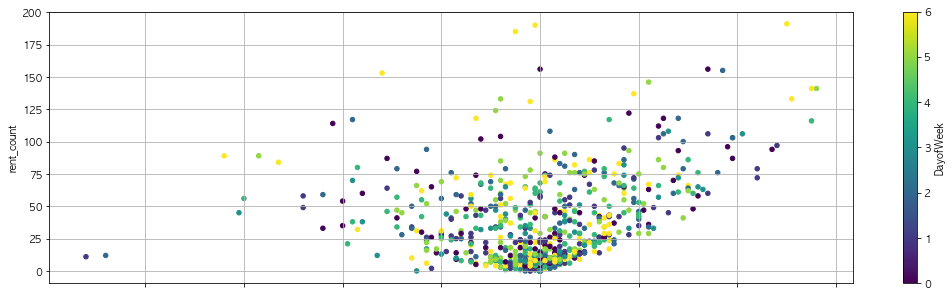

In [26]:
raw_all_gangdong.plot.scatter(y='rent_count', x='count_diff', c='DayofWeek', grid=True, figsize=(18,5), colormap='viridis')

array([[<AxesSubplot:title={'center':'rent_count'}>,
        <AxesSubplot:title={'center':'rent_trend'}>,
        <AxesSubplot:title={'center':'rent_seasonal'}>],
       [<AxesSubplot:title={'center':'count_Day'}>,
        <AxesSubplot:title={'center':'count_Week'}>,
        <AxesSubplot:title={'center':'count_diff'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Quarter'}>,
        <AxesSubplot:title={'center':'DayofWeek'}>],
       [<AxesSubplot:title={'center':'rent_count_lag1'}>,
        <AxesSubplot:title={'center':'rent_count_lag2'}>, <AxesSubplot:>]],
      dtype=object)

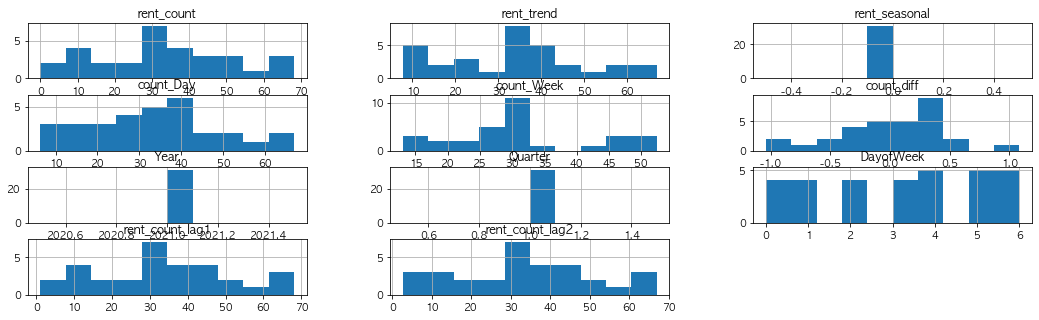

In [32]:
raw_all_gangdong.groupby('Day').mean().hist(figsize=(18,5))

In [45]:
raw_all_gangdong.corr().loc[:, ['rent_count']].style.background_gradient().set_precision(2)

,rent_count
rent_count,1.00
rent_trend,0.56
rent_seasonal,0.63
count_Day,0.45
count_Week,0.21
count_diff,0.25
Year,nan
Quarter,nan
Day,0.22
DayofWeek,-0.00
